# 数据分析实习生需求分析
>通过从实习僧网站上爬取全国数据分析实习生岗位的招聘信息475条，从而分析出目前全国的数据分析实习生大致的就业环境。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts
plt.style.use('ggplot')
%matplotlib inline

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(15,10))  #把plt默认的图片size调大一点

## 数据载入
数据属性：
- uuid：岗位id
- job_name：岗位名称
- minsal：最小日薪
- maxsal：最大日薪
- company：公司名称
- city：所在城市
- day：一周工作天数
- desc：岗位描述
- degree：学历要求

In [2]:
data = pd.read_csv('data/sxs_数据分析.csv', encoding='utf-8',  engine='python',
                   names=['uuid', 'job_name', 'minsal', 'maxsal', 'company', 'city', 'day', 'desc', 'degree'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 9 columns):
uuid        475 non-null object
job_name    475 non-null object
minsal      475 non-null int64
maxsal      475 non-null int64
company     475 non-null object
city        475 non-null object
day         475 non-null int64
desc        475 non-null object
degree      475 non-null object
dtypes: int64(3), object(6)
memory usage: 33.5+ KB


In [4]:
data.sample(5)

,uuid,job_name,minsal,maxsal,company,city,day,desc,degree
211,inn_lrzcrlszcdp5,数据分析实习生,100,120,广汇汽车,上海,4,"['\n\t', ' \n', '\n\t', ' \n']",本科
441,inn_7oz7oeaw5uow,20届 实习大数据分析顾问,130,150,凯捷咨询,"北京,成都,广州,上海,昆山",5,"['\n\t职位描述：\n', '\n\t', ' \n', '\n\t', ' \n', ...",本科
73,inn_iycutibd2cqs,临床数据分析实习生,150,200,GE Healthcare,杭州,5,"['\n\t3. ', ' （pytho or R）\n', '\n\t4．既能在导师指导下...",硕士
352,inn_xudh9am1ffuj,数据分析师助理,200,250,越铖国际,北京,5,[],大专
173,inn_mk9svdigglig,尚励—大数据分析实习生,100,150,实习僧,上海,3,"['\n\t[备注：本职位有实习僧代企业发布，并提供简历筛选和面试邀约等服务！]\n', '...",本科


## 数据清洗
1. 首先对重复项进行清洗
2. 对城市进行清洗
3. 求出各岗位月工资
4. 接着对岗位描述(desc)进行清洗

#### 对重复项进行清洗

In [5]:
# 查看是否存在重复项
data[data.duplicated()==True]

,uuid,job_name,minsal,maxsal,company,city,day,desc,degree
320,inn_kkdv23erkom1,数据分析实习助理实习生,80,150,神州数码,北京,5,"['1.参与数据分析和建模课题研究', '2.海量数据的数据挖掘', '3.根据特征工程进行...",硕士


In [6]:
# 如果有重复项去除重复项
data.drop_duplicates(keep='first',inplace=True)

#### 对城市进行清洗
将多城市工作以及全国工作的岗位进行剔除

In [7]:
data['city'].value_counts()

北京                174
上海                127
广州                 40
深圳                 24
杭州                 20
成都                 19
南京                 10
武汉                  8
苏州                  8
常州                  5
天津                  4
重庆                  4
西安                  3
合肥                  3
长沙                  3
佛山                  3
厦门                  2
宁波                  2
青岛                  1
大连                  1
沈阳                  1
北京,西安,厦门,上海         1
银川                  1
贵阳                  1
北京,成都,广州,上海,昆山      1
西安,西宁,乌鲁木齐          1
郑州                  1
韶关                  1
全国                  1
中山                  1
重庆,石家庄              1
福州                  1
北京,深圳,上海,杭州         1
Name: city, dtype: int64

In [8]:
index = data[data['city'].str.len() > 2].index.tolist()
data.drop(index=index,inplace=True)

#### 求出各岗位月工资
首先根据最高日薪(maxsal)以及最低日薪(minsal)求出平均日薪(avg_sal)，接着根据每周工作天数(day)求出每周的薪酬，再按照一个月4周计算月工资(mon_sal)

In [9]:
data['avg_sal'] = (data['maxsal']+data['minsal'])/2
data['mon_sal'] = data['avg_sal']*data['day']*4

In [10]:
# 去除异常值(月工资为0)
index = data[data['mon_sal'] == 0].index.tolist()
data.drop(index=index, inplace=True)

In [11]:
data.sample(5)

,uuid,job_name,minsal,maxsal,company,city,day,desc,degree,avg_sal,mon_sal
211,inn_lrzcrlszcdp5,数据分析实习生,100,120,广汇汽车,上海,4,"['\n\t', ' \n', '\n\t', ' \n']",本科,110.0,1760.0
133,inn_tmxebmdmgim8,数据分析师助理,150,200,景星科技,北京,5,"['\n\t', '\n', '\n\t', '\n', '\n\t', '\n', '\n...",本科,175.0,3500.0
307,inn_zy5prggrbpx6,数据分析师,150,200,星火教育,广州,4,"['\n\t你将需要做：\n', '\n\t', '\n', '\n', '\n', '\n...",本科,175.0,2800.0
48,inn_irtxn6f6zopk,数据分析,120,120,银雁科技,南京,5,"['\n\t实习生工作职责：\n', '\n\t数据标注或者语音标注岗位，工作轻松，无技术含...",大专,120.0,2400.0
33,inn_fgub4grt3xku,数据分析实习生（韶关驻点）,150,200,精点数据,韶关,5,"['\n\t', '\n', '\n\t1、派驻至韶关地市移动分公司现场代维提数项目；\n'...",硕士,175.0,3500.0


#### 对岗位描述(desc)进行清洗

In [12]:
data['desc'].sample(10)

269                                                   []
49     ['【关于我们】', 'Gekko Lab 是一个年轻有活力的数据科学团队。85%是90后年...
73     ['\n\t3. ', ' （pytho or R）\n', '\n\t4．既能在导师指导下...
266    ['\n\t', ' \n', '\n\t', ' \n', '\n\t', ' \n', ...
440    [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ...
325    ['\n\t', ' \n', '\n\t', '\n', '\n\t本职位由FESCO A...
146    ['\n\t', '在', '框架下针对场内', '场外期权组合投资的', '和', '蒙特...
148    ['\n\t岗位职责：', '\n', '\n1．处理公司加盟商品牌的门店经营、销售人员等数...
15     ['\n\t工作职责', '\n1、协助分析师进行市场&用户数据的分析与整理，并将分析出的数...
432    ['\n\t3、学习能力强，较强的信息搜集能力和数据处理能力；\n', '\n\t4、熟练使...
Name: desc, dtype: object

In [13]:
data.sample(5)

,uuid,job_name,minsal,maxsal,company,city,day,desc,degree,avg_sal,mon_sal
108,inn_q4fvqb0wfazu,数据分析研发工程师助理,100,150,广州盛原成,广州,5,[],不限,125.0,2500.0
244,inn_zfrl6p88wew8,数据分析员,150,200,上海奥深,上海,5,"['\n\t岗位职责：', '\n1. 对整个电子商务部门的数据进行处理分析，对采购、物流、...",本科,175.0,3500.0
269,inn_m3uxc1g9ytkm,数据分析实习生,150,200,易车网,北京,4,[],本科,175.0,2800.0
203,inn_9wpnmot67avx,数据分析师,120,150,中评信用,北京,4,"['\n\t', '\n', '\n\t', '\n', '\n\t', '\n', '\n...",本科,135.0,2160.0
229,inn_wri7fln1quci,管培生-数据分析方向,120,150,宜信普惠,北京,5,[],硕士,135.0,2700.0


In [14]:
data['desc_clean']=data['desc']

In [15]:
data['desc_clean'] = data['desc_clean'].str.replace('[', '')
data['desc_clean'] = data['desc_clean'].str.replace(']', '')
data['desc_clean'] = data['desc_clean'].str.replace('\\', '')
data['desc_clean'] = data['desc_clean'].str.replace('n', '')
data['desc_clean'] = data['desc_clean'].str.replace('t', '')
data['desc_clean'] = data['desc_clean'].str.replace('\'', '')
data['desc_clean'] = data['desc_clean'].str.replace(',', '')
data['desc_clean'] = data['desc_clean'].str.replace('xa0', '')
data['desc_clean'] = data['desc_clean'].str.strip()

In [16]:
def replace_null(data):
    if data == '':
        return '无明确要求'
    else:
        return data
data['desc_clean']=data['desc_clean'].apply(replace_null)

In [17]:
data.sample(5)

,uuid,job_name,minsal,maxsal,company,city,day,desc,degree,avg_sal,mon_sal,desc_clean
209,inn_1a0ri5tgkay4,数据分析实习生,100,120,玛氏箭牌,北京,5,"['玛氏箭牌糖果（中国）有限公司', '【招聘岗位】: 客户及渠道市场营销部门数据分析实习生...",本科,110.0,2200.0,玛氏箭牌糖果（中国）有限公司 【招聘岗位】: 客户及渠道市场营销部门数据分析实习生 【岗位描...
113,inn_xghvyp34nbvi,遥感数据分析实习生,120,150,佳格天地,北京,4,"['\n\t岗位职责：', '\n1. 参与项目相关遥感数据的分析支持；', '\n2. 编...",硕士,135.0,2160.0,岗位职责： 1. 参与项目相关遥感数据的分析支持； 2. 编写自动化脚本解决工作中常用的工作...
242,inn_3ijbzbsj8qoq,数据分析实习生,110,120,家得宝,深圳,3,"['\n\t主要职能为协助质量部完成系统数据输入及整理工作，\n', '\n\t涉及数据的维...",本科,115.0,1380.0,主要职能为协助质量部完成系统数据输入及整理工作， 涉及数据的维护和分析， 以及其他的一些辅助...
35,inn_g47rk3vsxrz0,数据分析师,200,250,熙数科技,上海,3,"['\n\t岗位职责：\n', '\n\t\xa0\xa0\xa0\xa0\xa0\xa0\...",硕士,225.0,2700.0,岗位职责： 1.对各类交易、支付、信贷、销售等行业的数据进行分析； 2.根据数据的要求，...
170,inn_lbz9nskqmcvn,数据采集与分析实习生,100,150,普天技术,北京,4,"['\n\t', '\n', '\n\t', '\n', '\n\t', '\n', '\n...",硕士,125.0,2000.0,无明确要求


## 数据分析
主要回到以下问题：
1. 数据分析实习生职位城市需求分析？
2. 数据分析实习生职位公司需求分析？
3. 哪些公司的数据分析实习生岗位相对较轻松(工资高，一周上班时间少)？
4. 数据分析实习生的文凭要求？

In [18]:
data_clean = data

In [19]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 473
Data columns (total 12 columns):
uuid          453 non-null object
job_name      453 non-null object
minsal        453 non-null int64
maxsal        453 non-null int64
company       453 non-null object
city          453 non-null object
day           453 non-null int64
desc          453 non-null object
degree        453 non-null object
avg_sal       453 non-null float64
mon_sal       453 non-null float64
desc_clean    453 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 46.0+ KB


In [20]:
data_clean.sample(5)

,uuid,job_name,minsal,maxsal,company,city,day,desc,degree,avg_sal,mon_sal,desc_clean
194,inn_b6wjevufpqud,数据分析-管培生,120,150,数字100,上海,3,"['公司介绍', '数字一百市场咨询有限公司成立于2004年2月，是一家将现代调查工具、专业...",不限,135.0,1620.0,公司介绍 数字一百市场咨询有限公司成立于2004年2月，是一家将现代调查工具、专业模型产品与...
425,inn_c6lxi1mctdwl,数据分析师助理,100,150,FIR.ai,上海,4,"['\n\t', ' \n']",本科,125.0,2000.0,无明确要求
131,inn_u1hgvcmuinsf,数据分析管培生,100,150,琥珀创想,北京,5,[' '],本科,125.0,2500.0,无明确要求
123,inn_pilfmpqbv5mc,数据分析工程师（实习）,250,300,莱克贝尔,北京,4,[],本科,275.0,4400.0,无明确要求
214,inn_oy5thgrz9ydc,咨询部数据分析实习生（IARCS）,100,150,KPMG,上海,4,"['\n\t', '\n', '\n\t', '\n', '\n\t', '\n', '\n...",不限,125.0,2000.0,无明确要求


#### 1. 数据分析实习生职位城市需求分析？
- 城市岗位需求分析
- 城市岗位薪资分析

**城市岗位需求分析**

In [21]:
city_counts_top10 = data_clean['city'].value_counts()[:10]
city_counts_top10

北京    166
上海    127
广州     40
深圳     23
杭州     20
成都     18
南京     10
武汉      8
苏州      5
常州      5
Name: city, dtype: int64

In [22]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType

bar = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(list(city_counts_top10.index))
    .add_yaxis('数量', city_counts_top10.tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title='城市职位需求量Top10'))
)
bar.render_notebook()

In [23]:
# Top10城市需求在总体需求中的占比
ratio_city = np.round(data_clean['city'].value_counts()/len(data_clean['city'])*100,1)[:10]
ratio_city['其他'] = np.round(100 - np.sum(ratio_city.values),1)
ratio_city

北京    36.6
上海    28.0
广州     8.8
深圳     5.1
杭州     4.4
成都     4.0
南京     2.2
武汉     1.8
苏州     1.1
常州     1.1
其他     6.9
Name: city, dtype: float64

In [24]:
from pyecharts import options as opts
from pyecharts.charts import Page, Pie

pie = (
        Pie(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
        .add(
            "",
            [tuple(z) for z in zip(ratio_city.index.tolist(), ratio_city.tolist())],
            radius=["40%", "75%"],
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title="Top10城市需求在总体需求中的占比"),
            legend_opts=opts.LegendOpts(
                orient="vertical", pos_top="15%", pos_left="2%"
            ),
        )
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}%"))
    )
pie.render_notebook()

### 结论
由上述分析可知，目前数据分析实习生的岗位需求主要还是集中在**北京、上海、广州、深圳**四个一线城市，岗位一线城市需求占比**超过50%**。其次，在新一线城市（如杭州、成都、武汉、南京）也有一定需求。

**城市岗位薪资分析**

In [25]:
# 城市平均工资top10
np.round(data_clean.groupby('city')['mon_sal'].mean(),1).nlargest(10)

city
大连    4500.0
宁波    4500.0
贵阳    3500.0
韶关    3500.0
深圳    3166.5
杭州    3058.0
北京    2991.1
成都    2818.9
常州    2800.0
武汉    2663.8
Name: mon_sal, dtype: float64

In [26]:
# 岗位需求top10城市的工资
top10_city = city_counts_top10.index.tolist()
top10_city_sal = np.round(data_clean[data_clean['city'].isin(top10_city)].groupby(
    'city')['mon_sal'].mean(), 1).sort_values(ascending=False)
top10_city_sal

city
深圳    3166.5
杭州    3058.0
北京    2991.1
成都    2818.9
常州    2800.0
武汉    2663.8
上海    2431.3
南京    2430.0
苏州    2260.0
广州    1985.4
Name: mon_sal, dtype: float64

In [27]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType

bar = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(list(top10_city_sal.index))
    .add_yaxis('工资', top10_city_sal.tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title='Top10城市平均工资'))
)
bar.render_notebook()

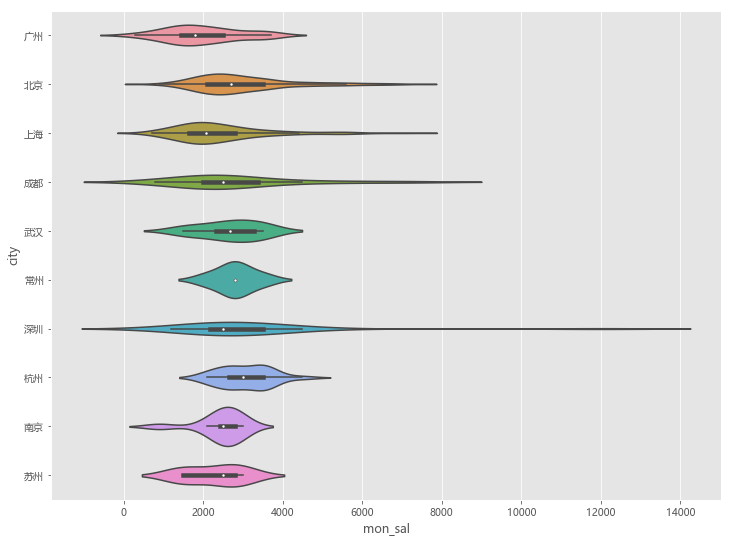

In [28]:
plt.rc('figure', figsize=(12,9))
# top10城市工资分布
top10_city_sal = data_clean[data_clean['city'].isin(top10_city)]
sns.violinplot(x='mon_sal', y='city', data=top10_city_sal)

### 结论
通过上面的分析可得，该职位在**深圳的平均工资最高(3166.5元/月)**，在**广州的平均工资最低(1985.4元/月)**。另外，通过对整体的工资分布情况进行分析，目前数据分析实习生的月工资主要集中在**2000-3000**这个档位，深圳、成都、上海、北京的薪资幅度变化最大，常州、南京的薪资幅度变化相对较小，且月实习工资的分布主要在2000-3000元/月。

#### 2. 数据分析实习生职位公司需求分析？

- top10城市岗位需求最多的公司

In [29]:
def topN(data):
    counts = data.value_counts()
    return counts[:5]


data_clean[data_clean['city'].isin(top10_city)].groupby('city')[
    'company'].apply(topN)

city                 
上海    NIO蔚来              5
      数行科技               3
      FIR.ai             2
      广汇汽车               2
      中华英才               2
北京    滴滴出行               9
      网易                 4
      百融云创               4
      京东数科               3
      猎聘网                3
南京    指南者教育              2
      指食针                1
      银雁科技               1
      九信                 1
      孩子王                1
常州    指南者教育              2
      博世汽车               1
      指南者留学              1
      compassedu指南者教育    1
广州    广州银行信用卡中心          3
      网易有道               2
      虎牙信息               2
      电通数码               1
      达能饮料               1
成都    麦可思数据              2
      繁星数据               1
      正合地产               1
      链家地产               1
      中电健康云              1
杭州    袋鼠云                2
      滴滴                 2
      惠借科技               2
      GE Healthcare      1
      同花顺                1
武汉    安天信息               1
      斗鱼                 1
      

- 月工资最高的top15企业

In [30]:
data_clean.sort_values(by='mon_sal',ascending=False)[:15][['city','company','job_name','mon_sal']]

,city,company,job_name,mon_sal
19,深圳,木核科技,业务数据分析师,12000.0
3,成都,繁星数据,金融数据分析师,7200.0
176,上海,NIO蔚来,数据分析实习生-区域运营,7000.0
128,北京,饮鹿网,数据分析师,7000.0
26,北京,北京链家,数据分析统筹岗,6600.0
120,北京,滴滴出行,数据策略分析师—西班牙语,6500.0
144,北京,滴滴出行,数据策略分析实习生—西班牙语,6500.0
285,北京,昆仑数据,暑期实习生 - 数据分析类,6400.0
275,北京,任买科技,数据分析DA实习生,6000.0
153,成都,麦可思数据,数据分析师-成都-00546,5600.0


#### 3. 哪些公司的数据分析实习生岗位相对较轻松(工资高，一周上班时间少)？

In [31]:
data_clean.sort_values(by=['avg_sal','day'],ascending=[False,True])[['city','company','job_name','avg_sal','day']][:10]

,city,company,job_name,avg_sal,day
19,深圳,木核科技,业务数据分析师,600.0,5
285,北京,昆仑数据,暑期实习生 - 数据分析类,400.0,4
315,上海,东方财富网,金融大数据分析（智能投研/智能写稿方向）,350.0,3
316,上海,东方财富网,金融大数据分析（金融数据挖掘方向）,350.0,3
82,上海,NIO蔚来,数据分析师（BI）实习生,350.0,4
141,上海,NIO蔚来,数据分析支持实习生,350.0,4
153,成都,麦可思数据,数据分析师-成都-00546,350.0,4
212,上海,NIO蔚来,企业发展-数据分析实习生,350.0,4
294,上海,NIO蔚来,数据分析工程师（电动力工程）,350.0,4
356,北京,品钛集团,数据分析/量化/模型实习生,350.0,4


#### 4. 数据分析实习生的文凭要求？

In [32]:
degree_demand = data_clean['degree'].value_counts()
degree_demand

本科    293
硕士     70
不限     69
大专     20
博士      1
Name: degree, dtype: int64

In [33]:
from pyecharts import options as opts
from pyecharts.charts import Page, Pie

pie = (
    Pie(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add("", [list(z) for z in zip(degree_demand.index.tolist(), degree_demand.tolist())])
    .set_global_opts(title_opts=opts.TitleOpts(title="学历要求"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
)

pie.render_notebook()

In [34]:
# 学历对薪资的影响
np.round(data_clean.groupby('degree')['mon_sal'].mean().sort_values(ascending=False),1)

degree
硕士    2766.7
本科    2695.6
大专    2607.5
不限    2532.0
博士    2100.0
Name: mon_sal, dtype: float64

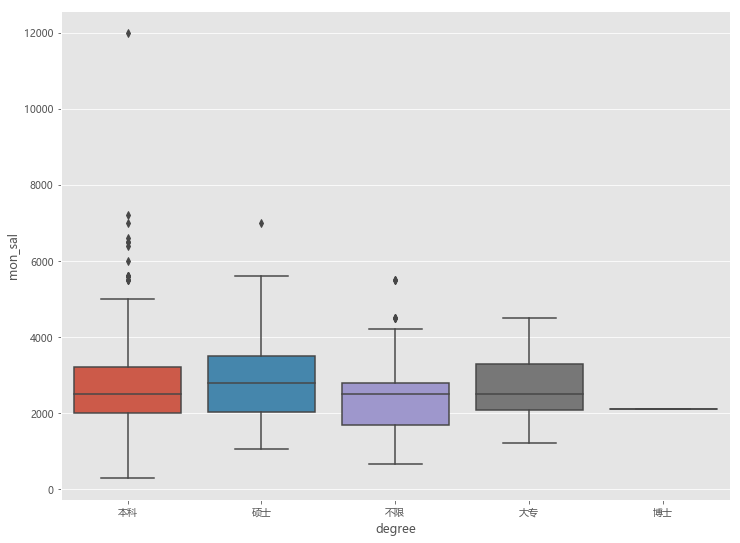

In [35]:
plt.rc('figure', figsize=(12,9))
sns.boxplot(x="degree", y="mon_sal", data=data_clean)

### 结论
有上述分析可知，目前数据分析实习生岗位主要还是以**本科生学历**为主，对硕士及博士的需求不算特别高。另外，从学历与薪资的关系来看，各文凭的平均薪资相对接近，**说明数据分析实习生对学历的依赖程度不大**。从薪资分布来看，**硕士学历**的求职者相对于其他学历，起始工资相对较高，其上升空间较大。